# Module-5: Modern Portfolio Theory

###### Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 5.1 Mean daily returns and daily std of returns

In [2]:
voltas = pd.read_csv('VOLTAS.csv')
voltas = voltas[voltas['Series']=='EQ']
voltas.Date = pd.to_datetime(voltas['Date'])
voltas = voltas.set_index('Date')
voltas = voltas.dropna()

In [3]:
voltas['Daily_change'] = voltas['Close Price'].pct_change()*100

mean_daily_returns = voltas['Daily_change'].mean()
daily_std_returns = voltas['Daily_change'].std()

annual_mean = mean_daily_returns*252
annual_std = daily_std_returns*252**0.5

## 5.2 Diversifying Portfolio

In [4]:
stocks = {
    'cummins':'CUMMINSIND.csv',
    'amaraj':'AMARAJABAT.csv',
    'jindal':'JINDALSTEL.csv',
    'mrpl':'MRPL.csv',
    'voltas':'VOLTAS.csv'
}

df={}
dailyvalues={}
annualvalues={}

for name, csv in stocks.items():
    
    df[name] = pd.read_csv(csv)
    if csv != 'Nifty50.csv':
        df[name] = df[name][df[name]['Series']=='EQ']
    df[name].Date = pd.to_datetime(df[name]['Date'])
    df[name] = df[name].set_index('Date')
    df[name] = df[name].dropna()
    
    df[name]['Daily_change'] = df[name]['Close Price'].pct_change()
    df[name].dropna(inplace = True)
    
    dailyvalues[name] = [df[name].Daily_change.mean(), df[name].Daily_change.std()]
    annualvalues[name] = [dailyvalues[name][0]*252, dailyvalues[name][1]*252**0.5]
    
print('(name: [mean, std]')
print('--------Daily')
for i in dailyvalues.items():
    print(i)
    
print('')
print('------------annually')
for i in annualvalues.items():
    print(i)

(name: [mean, std]
--------Daily
('cummins', [-0.0007048761770509895, 0.018680530722494714])
('amaraj', [-0.0006692633871389055, 0.01684621584757129])
('jindal', [0.0010927419290979227, 0.031054811233523247])
('mrpl', [-0.0012815754975174917, 0.023049398044647194])
('voltas', [0.0007580562036287222, 0.01942400288315044])

------------annually
('cummins', [-0.17762879661684935, 0.29654423190253654])
('amaraj', [-0.16865437355900417, 0.2674253859911329])
('jindal', [0.27537096613267653, 0.49297984521574506])
('mrpl', [-0.3229570253744079, 0.3658978505752496])
('voltas', [0.19103016331443798, 0.308346486565306])


In [5]:
# Reference:=> https://blog.quantinsti.com/calculating-covariance-matrix-portfolio-variance/
S = {}
means = []
for stock in df.keys():
    S[stock] = df[stock]["Daily_change"]
    means.append(df[stock]["Daily_change"].mean())

S = pd.DataFrame(data=S)
cov = np.cov(S.values.reshape((S.shape[1], S.shape[0])))  
means = np.array(means).reshape((1, 5))

weights =  np.ones((5, 1))*(1/5)    #Equal weights to all stocks
returns = np.matmul(means, weights)
volatility = np.sqrt(np.matmul(np.matmul(weights.T, cov), weights))
print('returns:', returns[0][0])
print('', '=======')
print('volatility:', volatility[0][0])

returns: -0.00016098338579614838
volatility: 0.0103651417236556


## 5.3 & 5.4 Scatter plot

In [7]:
temp = np.linspace(0, 1, 21)  # values for different weights
weights = []      #NOTE: sum(weights)=1
for i in temp:
    for j in temp:
        if i+j<=1:
            for k in temp:
                if i+j+k<=1:
                    for l in temp:
                        if i+j+k+l<=1:
                            for m in temp:
                                if i+j+k+l+m==1:
                                    weights.append([i, j, k, l, m])

std = []
ret = []
for W in weights:
    W = np.array(W).reshape((5, 1))
    std.append(np.sqrt(np.matmul(np.matmul(W.T, cov), W))[0][0])   
    ret.append(np.matmul(means, W))

port2 = min(std)
ind2 = std.index(port2)
ratio = []
m, inc=0, 0

for i,j in zip(ret, std):
    r = i/j
    ratio.append(r)
            
    if r>m:
        m=r
        ind1 = inc
        
    inc+=1

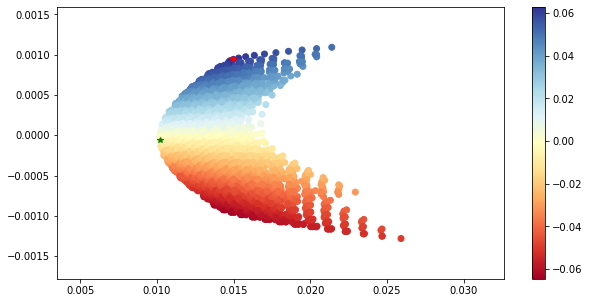

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
cm = plt.cm.get_cmap('RdYlBu')

ax = plt.scatter(std, ret, c=ratio, cmap=cm)
plt.colorbar(ax)

plt.plot(std[ind2], ret[ind2], 'g*')
plt.plot(std[ind1], ret[ind1], 'r*')
plt.ylim(min(ret)-0.0005, max(ret)+0.0005)
plt.show()